In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

1.Data Processing

In [15]:
data=pd.read_excel("/Users/zoezhou/Desktop/UCHICAGO FALL2018/Machine Learning/default of credit card clients.xls")
print(data.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [21]:
data_cleaned= data.dropna(how='any', axis = 0)

In [22]:
data_cleaned.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [47]:
data_train,data_test=train_test_split(data_cleaned, test_size = 0.3, random_state = 42)
x_train=data_train[data_train.columns.drop(['default payment next month'])]
y_train=data_train["default payment next month"].values.ravel()
x_test=data_test[data_test.columns.drop(['default payment next month'])]
y_test=data_test["default payment next month"].values.ravel()

2. Random Forest Classifier - Base Model:

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [55]:
#create Gaussian classifier
rfbase_clf=RandomForestClassifier(random_state=42,n_estimators=1000)
#train the model using the training set
rfbase_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [56]:
#limit to probability for class = 1 
y_test_p=rfbase_clf.predict(x_test)

In [57]:
base_probs=rfbase_clf.predict_proba(x_test)[:,1]

In [58]:
#confusion matrix
confusion_matrix(y_test,y_test_p)

array([[6616,  424],
       [1239,  721]])

In [59]:
#classification report
print(classification_report(y_test,y_test_p))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.37      0.46      1960

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [60]:
roc_auc_score(y_test,base_probs)

0.7605621303919295

#3. Random Forest Classifier - Grid Search

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {
    'max_features':[2, 4, 6],
'n_estimators':[500,750,1000],
'random_state':[42]
            }


In [63]:
rf_obj=RandomForestClassifier()
rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

In [64]:
rf_Grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 28.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [2, 4, 6], 'n_estimators': [500, 750, 1000], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=5)

In [69]:
#This method outputs to best performing parameters
rf_Grid.best_params_

{'max_features': 2, 'n_estimators': 750, 'random_state': 42}

In [72]:
# This method outputs the best performing model, and can be used for predicting on the X_test
rf_best=rf_Grid.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=750, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [73]:
rf_best_pred_resp = rf_best.predict(x_test)

In [81]:
rf_best_pred_prob = rf_best.predict_proba(x_test)[:,1]

In [75]:
print(confusion_matrix(y_test,rf_best_pred_resp))

[[6621  419]
 [1256  704]]


In [76]:
print(classification_report(y_test,rf_best_pred_resp))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.36      0.46      1960

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [82]:
print(roc_auc_score(y_test, rf_best_pred_prob))

0.7613699776785715


#4 What are the best parameters from the Grid Search? Does the Model from #3 outperform Model #2?

From #3, {'max_features': 2, 'n_estimators': 750, 'random_state': 42} is the best model. The auc score from #3 is 0.7614, yet the auc score from #2 is 0.7606. However, it took a long time to run model 3, so model 2 will be enough.

#5. Create a feature importance plot for your best performing model. What are the top 5 features for this model? 

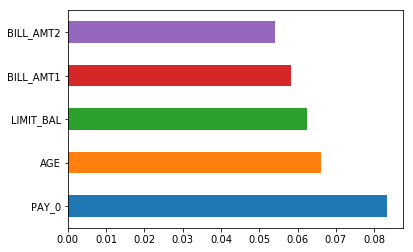

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_importances = pd.Series(rf_best.feature_importances_, index = x_test.columns)
feature_importances.nlargest(5).plot(kind='barh')

#Save the model for later use

In [88]:
import pickle
classifier_pkl_path = '/Users/zoezhou/Desktop/UCHICAGO FALL2018/Machine Learning/best_rf_classifier.pkl'

# Open the file to save as pkl file
classifier_model_pkl = open(classifier_pkl_path, 'wb')
pickle.dump(rf_best, classifier_model_pkl)

# Close the pickle instances
classifier_model_pkl.close()